In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neo.rawio import NeuralynxRawIO, OpenEphysRawIO, get_rawio_class
from readers import NeuralynxReader

In [2]:
%%time
DATA_FOLDER = '/media/sil2/Data/Lizard/lorenz_data/2020-10-31_18-01-59'
reader = NeuralynxReader(DATA_FOLDER, 32)

CPU times: user 13.4 s, sys: 3.03 s, total: 16.4 s
Wall time: 31.2 s


In [3]:
i_stop = int(reader.fs * 60*10)
V, start_indices = reader.read_segmented(w=1.5, overlap=0.75, i_start=0, i_stop=i_stop, lowpass=50, decimate_q=50, wavelet=None)

Buffered Matrix size: (1596, 960)
Number of segments after buffering: 1596


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
V_norm = scaler.fit_transform(V)

In [5]:
V_norm = V_norm.reshape((*V_norm.shape, 1))

In [14]:
from clusterers import vae

cl = vae.VAE2(original_dim=V_norm.shape[1], latent_dim=4, intermediate_dim=32)
history = cl.train(V_norm, is_print=True)

NotImplementedError: Cannot convert a symbolic Tensor (lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [29]:
cl.vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 960, 1)]     0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 4), (None, 4 17416       input_9[0][0]                    
__________________________________________________________________________________________________
decoder (Functional)            (None, 960, 1)       17729       encoder[0][2]                    
__________________________________________________________________________________________________
lstm_14 (LSTM)                  (None, 64)           16896       input_9[0][0]                    
____________________________________________________________________________________________

In [30]:
# lorenz
DATA_FOLDER = '/media/sil2/Data/Lizard/lorenz_data/2020-10-31_18-01-59'
reader = NeuralynxReader(DATA_FOLDER, 32)
v = reader.read().flatten()
dt = 1 / reader.fs
t = np.arange(0, len(v) * dt, dt)
assert len(t) == len(v)

In [45]:
len(v)

1808281823

Start SOM clustering...
Num labels: 20


  0%|          | 0/150687 [00:00<?, ?it/s]

Labels kept after statistical test:
16: U=-8.55, p=0.00000
1: U=8.84, p=0.00000
14: U=7.29, p=0.00000
17: U=-5.72, p=0.00000
18: U=-5.22, p=0.00000
6: U=-4.17, p=0.00008
Labels omitted after statistical test:
9: U=-3.20, p=0.00203
4: U=-2.81, p=0.00653
13: U=-2.75, p=0.00768
2: U=-2.61, p=0.01070
5: U=2.39, p=0.01935
8: U=1.79, p=0.07789
7: U=1.62, p=0.10832
15: U=-1.54, p=0.12707
10: U=-1.48, p=0.14252
3: U=-1.46, p=0.14769
12: U=-0.88, p=0.38326
0: U=0.81, p=0.42326
19: U=0.54, p=0.59192
11: U=0.11, p=0.90975


  0%|          | 0/150687 [00:00<?, ?it/s]

0it [00:00, ?it/s]

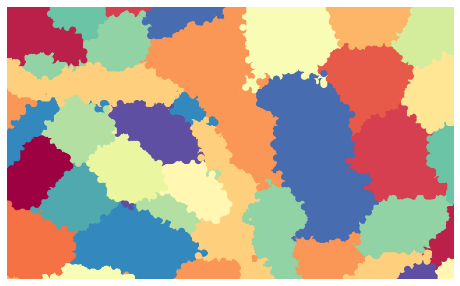

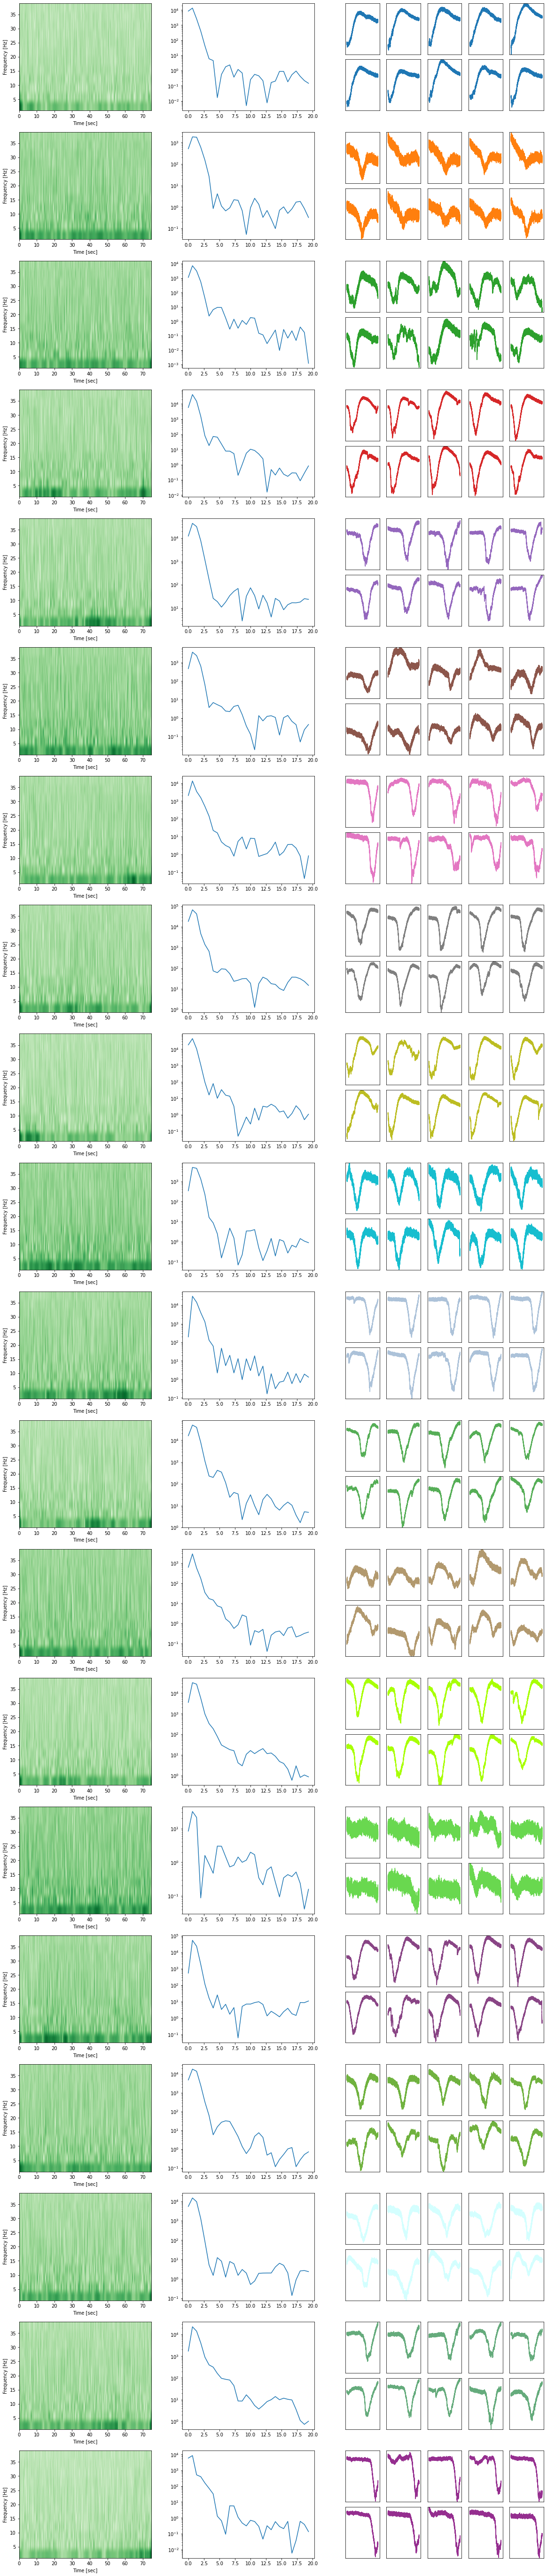

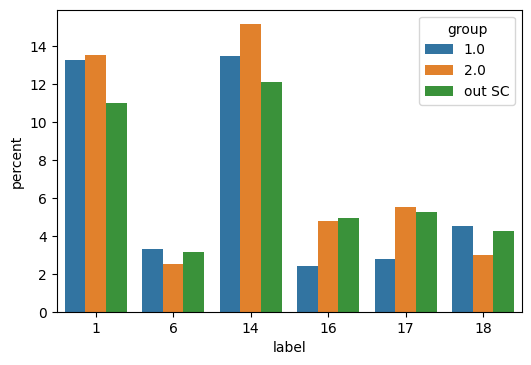

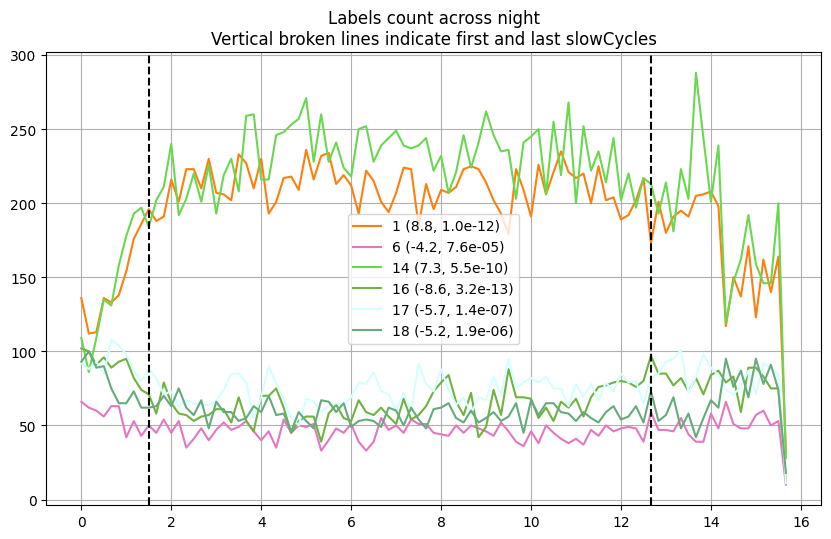

  0%|          | 0/6 [00:00<?, ?it/s]

AttributeError: 'NeuralynxReader' object has no attribute 'v'

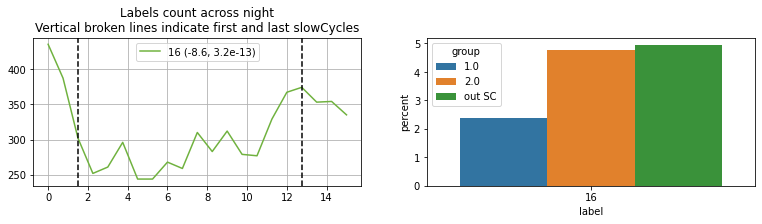

In [48]:
# cl = Clusterer(reader, decimate_q=50, channel=32)
# # cl.train(v, t, n_clusters=10)
# cl.X, start_indices = cl.buffer_signal(v)
# cl.sig_df = cl.create_sig_df(t, start_indices)
# X_pca = cl.run_pca(cl.X)
# cl.train_som(X_pca)
# cl.save_analysis_cache_data()
n = 20
cluster_algo = cl.cluster_som(n)
cl.update_clusters(t)
cl.find_distances_to_cluster_centers(X_pca, cluster_algo)
cl.plot_clusters(v, is_save=True, only_relevant=False)
cl.plot_clusters_histogram(is_save=True)
cl.plot_clusters_across_night(t, is_save=True)
cl.plot_label_summary(t, is_save=True)

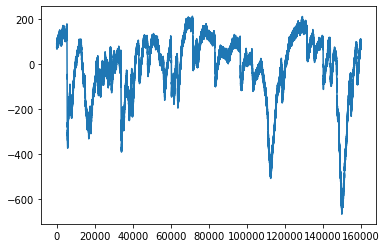

In [13]:
i = int(reader.fs * 5)
plt.plot(data[i:2*i])

In [12]:
get_rawio_class('/media/sil1/Morelia spilota/Morelia spilota 1/MergedBin/Hephaistos_EEPHY-AUX-IMU_2021-07-15_08-00-00-092.bin')

neo.rawio.axonarawio.AxonaRawIO

In [2]:
DATA_FOLDER = "/media/sil2/Data/Lizard/Stellagama/SA07/SA07_02_06_21_Trial14_30D"
reader = OpenEphysBinaryRawIO(DATA_FOLDER)
reader.parse_header()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [11]:
from readers.snakes import SnakeReader
DATA_FOLDER = '/media/sil1/Morelia spilota/Morelia spilota 1'
sr = SnakeReader(DATA_FOLDER)
pd.DataFrame(sr.channels)

,Id,Enable,Name,Offset,Gain,AcquisitionRangeMax,RecordType
0,1,true,EMG,0,1,0.0128,SingleEnded
1,2,true,DVRA4,0,1,0.0128,SingleEnded
2,3,true,DVRA3,0,1,0.0128,SingleEnded
3,4,true,DVRA2,0,1,0.0128,SingleEnded
4,5,true,DVRA1,0,1,0.0128,SingleEnded
5,6,true,DVRP4,0,1,0.0128,SingleEnded
6,7,true,DVRP3,0,1,0.0128,SingleEnded
7,8,true,DVRP2,0,1,0.0128,SingleEnded
8,9,true,DVRP1,0,1,0.0128,SingleEnded
9,10,true,EEGG,0,1,0.0128,SingleEnded


In [2]:
p = '/media/sil1/Morelia spilota/Morelia spilota 1/MergedBin/Hephaistos_EEPHY-AUX-IMU_2021-07-15_08-00-00-092.bin'
# with open(p, 'rb') as f:
#     data = f.read(1024).decode()
#
# data
data = np.fromfile(p, dtype=np.float64)

In [24]:
import xmltodict

root_dir = '/media/sil1/Morelia spilota/Morelia spilota 1'
with open(f'{root_dir}/Salazard B2.exp', 'r') as f:
    xml = f.read()

info = xmltodict.parse(xml)

In [27]:
info['Animal']

OrderedDict([('Enabled', 'true'),
             ('Name', 'Salazard'),
             ('FileOrigin',
              'Z:\\Animal\\Squamates\\Morelia spilota\\Salazard\\ephy\\2021_07_13_Baseline'),
             ('Acquisition',
              OrderedDict([('SamplingRate', '512'),
                           ('Enable', 'true'),
                           ('Files',
                            OrderedDict([('File',
                                          [OrderedDict([('FileName',
                                                         'MergedBin\\Hephaistos_EEPHY-AUX-IMU_2021-07-13_08-58-34-488.bin'),
                                                        ('TStart',
                                                         '2021-07-13T08:58:34.488'),
                                                        ('Duration',
                                                         '82876625')]),
                                           OrderedDict([('FileName',
                                      

In [35]:
data

{'header': {'format': "'Open Ephys Data Format'",
  ' version': '0.5',
  ' header_bytes': '1024',
  'description': "'each record contains one 64-bit timestamp, one 16-bit sample count (N), 1 uint16 recordingNumber, N 16-bit samples, and one 10-byte record marker (0 1 2 3 4 5 6 7 8 255)'",
  ' date_created': "'02-Jun-2021 16:42:14'",
  'channel': "'CH16'",
  'channelType': "'Continuous'",
  'sampleRate': '20000',
  'blockLength': '1024',
  'bitVolts': '0.195'},
 'timestamps': array([1.66574080e+07, 1.66584320e+07, 1.66594560e+07, ...,
        1.27347098e+09, 1.27347200e+09, 1.27347328e+09]),
 'data': array([-213.33 , -213.33 , -212.355, ...,    0.   ,    0.   ,    0.   ]),
 'recordingNumber': array([0., 0., 0., ..., 0., 0., 0.])}

In [11]:
DATA_FOLDER = '/media/sil2/Data/Lizard/lorenz_data/2020-10-31_18-01-59'
channel = 32
reader = OpenEphysRawIO(DATA_FOLDER)
reader.parse_header()
for k, v in reader.header.items():
    print(k, v)
sampling_rate = reader.get_signal_sampling_rate()
t_start = reader.get_signal_t_start(block_index=0, seg_index=0)
units = reader.header['signal_channels'][0]['units']
print(f'sampling_rate: {sampling_rate}')
print(f't_start: {t_start}')
print(f'units: {units}')

AssertionError: Not continuous timestamps for 109_CH1.continuous. Maybe because recording was paused/stopped.

In [5]:
reader = NeuralynxRawIO(DATA_FOLDER)
reader.parse_header()

In [6]:
for k, v in reader.header.items():
    print(k, v)

nb_block 1
nb_segment [1]
signal_streams [('signals', '0')]
signal_channels [('CSC30', '15', 32000., 'int16', 'uV', 0.15258789, 0., '0')
 ('CSC32', '11', 32000., 'int16', 'uV', 0.15258789, 0., '0')
 ('CSC62', '47', 32000., 'int16', 'uV', 0.15258789, 0., '0')
 ('CSC64', '43', 32000., 'int16', 'uV', 0.15258789, 0., '0')]
spike_channels []
event_channels [('Events event_id=11 ttl=0', 'unknown', b'event')
 ('Events event_id=11 ttl=8', 'unknown', b'event')
 ('Events event_id=11 ttl=32', 'unknown', b'event')
 ('Events event_id=19 ttl=0', 'unknown', b'event')]
